In [61]:
# to generate plots that shows fitting with ANN
# is clearly a function of the quantity of training data
# and the number of epochs

# data for fitting by the ANN is generated using a configurable multivariate
# linear model

# the code can also be changed easily to look at two alternative model
# architectures, and of course, the number of neurons in the dense layer can
# be modulated

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from math import ceil, floor
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Number of samples
num_samples = 2000

# Generate predictable random values for features
np.random.seed(0)
feature1 = np.random.rand(num_samples)
feature2 = np.random.rand(num_samples)
feature3 = np.random.rand(num_samples)

# Calculate y using the multivariate linear model
# some constants for data generation
c0 = 10
c1 = 1.2
c2 = 2.4
c3 = -3.9
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

# the equation the get the label aka y
label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * feature3)
# a text label from data generation
model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " X3".translate(SUB)

# non-linear regression example
#label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * ((1/feature3)**2))
#model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " (1 / X3)".translate(SUB) + " ** 2"

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'label': label
})
#print(data)

# Column to sort by, the label index
column_index = 3
print("\nSorted\n")
# Sort the array based on the specified column
data = data.sort_values(by='label')
# have a look at the generated data
print(data)


Sorted

      feature1  feature2  feature3      label
1234  0.004655  0.031293  0.976700   6.271559
313   0.089603  0.090969  0.995708   6.442590
1742  0.237973  0.019611  0.990306   6.470438
1587  0.034267  0.017343  0.919406   6.497060
1413  0.122086  0.023128  0.944879   6.516982
...        ...       ...       ...        ...
1884  0.937123  0.863827  0.042222  13.033068
38    0.943748  0.978857  0.055125  13.266769
1838  0.909093  0.946496  0.000570  13.360279
1093  0.885022  0.978229  0.002125  13.401487
654   0.859581  0.997046  0.002084  13.416281

[2000 rows x 4 columns]


In [63]:
# pull the data frame apart
X = data[['feature1', 'feature2', 'feature3']].values
y = data['label'].values

# print some data points from X and y
# remember syntax of slicing is different to perl
print_n = 5
print("Showing " + str(print_n) + " data points")
print("X:\n")
print(X[:print_n])
print("")
print("X.shape[1] = " + str(X.shape[1]))
print("")
print("y:\n")
print(y[:print_n])

Showing 5 data points
X:

[[0.00465484 0.03129253 0.97669963]
 [0.08960303 0.09096934 0.99570768]
 [0.23797254 0.0196105  0.99030617]
 [0.03426704 0.01734275 0.91940599]
 [0.12208561 0.02312839 0.9448793 ]]

X.shape[1] = 3

y:

[6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]


Set epochs_tup to  (1, 3, 5, 25, 50, 100, 200, 400, 1200)
epochs 1

Training loss begin: 75.95675659179688
Training loss   end: 75.95675659179688

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [1.0561646 1.1848699 1.1980922 1.0011431 1.0855038]
-----------------------------------------------------------
epochs 3



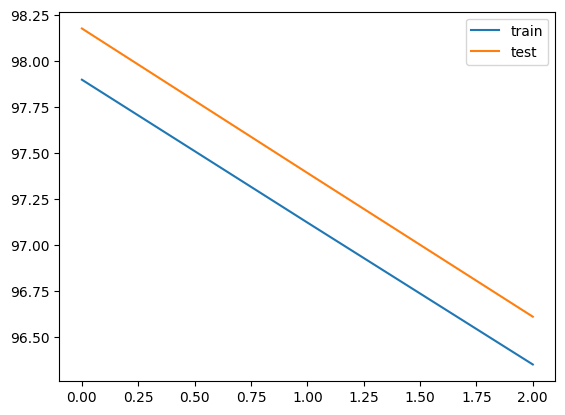

Training loss begin: 97.89823913574219
Training loss   end: 96.34822082519531

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [-0.6672595  -0.6115476  -0.53689116 -0.6104178  -0.5735215 ]
-----------------------------------------------------------
epochs 5



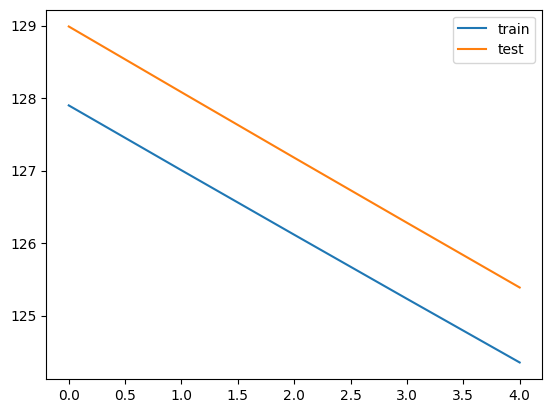

Training loss begin: 127.90019226074219
Training loss   end: 124.35436248779297

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [-0.40716422 -0.55985665 -0.60805726 -0.39139068 -0.4879653 ]
-----------------------------------------------------------
epochs 25



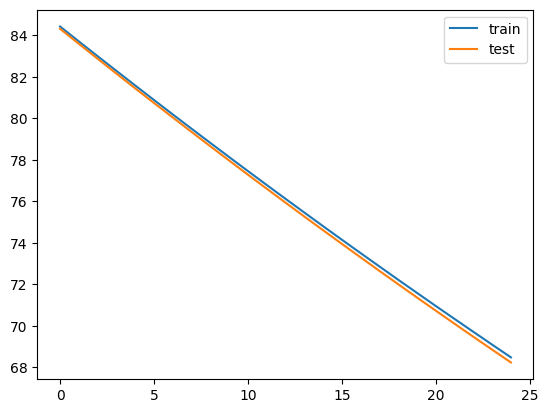

Training loss begin: 84.41907501220703
Training loss   end: 68.48042297363281

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [0.51451594 0.6954144  0.7430601  0.520324   0.6232404 ]
-----------------------------------------------------------
epochs 50



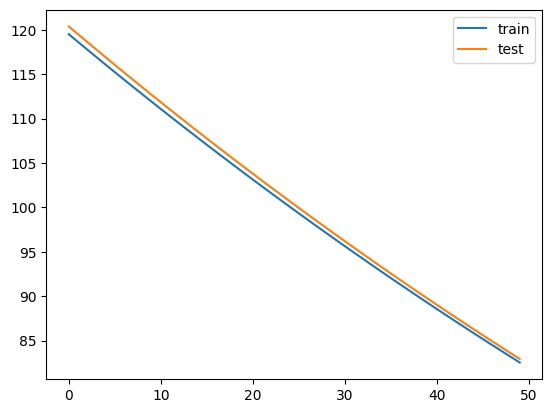

Training loss begin: 119.4944076538086
Training loss   end: 82.52494049072266

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [0.88444257 0.9032719  0.94912696 0.8866933  0.91250205]
-----------------------------------------------------------
epochs 100



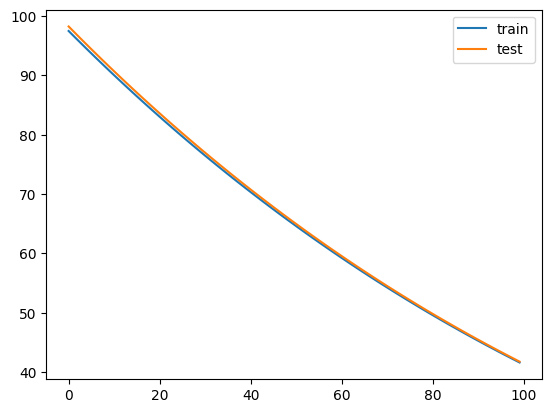

Training loss begin: 97.5029525756836
Training loss   end: 41.60860824584961

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [3.6487207 3.8834548 4.167138  3.5801253 3.8229442]
-----------------------------------------------------------
epochs 200



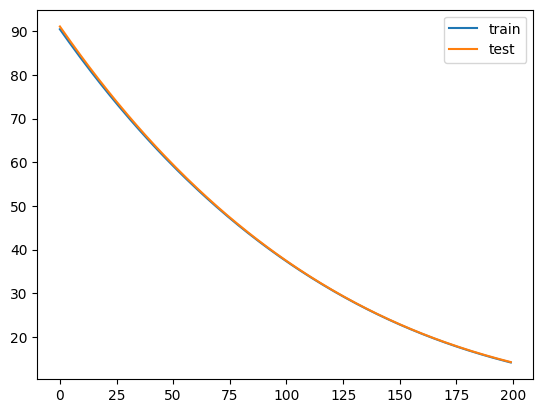

Training loss begin: 90.49858093261719
Training loss   end: 14.100299835205078

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [6.178697 6.632847 7.010373 6.0532   6.455205]
-----------------------------------------------------------
epochs 400



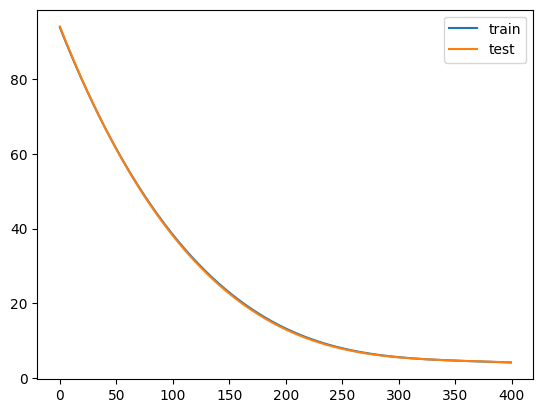

Training loss begin: 93.8447265625
Training loss   end: 4.178728103637695

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [6.130848  6.801898  7.190233  6.1029735 6.5815   ]
-----------------------------------------------------------
epochs 1200



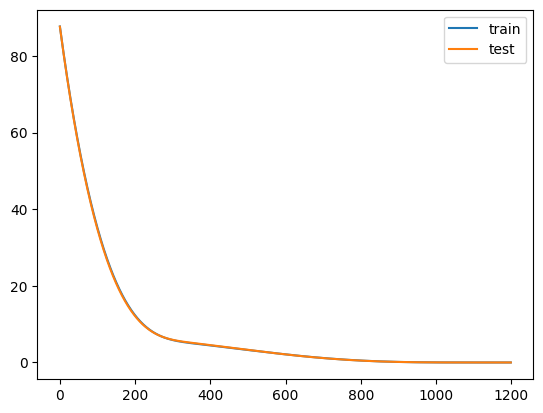

Training loss begin: 87.7071762084961
Training loss   end: 2.3806624227518114e-08

Showing  5  sample values..

          y:  [6.27155933 6.4425901  6.47043818 6.49705968 6.51698159]
predictions:  [6.271462  6.4425354 6.470399  6.4969444 6.5168986]
-----------------------------------------------------------


In [64]:
# Create a list to store the plot data (axes)
series = []
titles = []

# Define the number of plots in the grid
# Number of rows and columns for the grid
epochs_tup = ()
if (False):
  epochs_tup = (1, 5, 50, 100)
  n_rows = 2
  n_cols = 2
elif (False):
  epochs_tup = (1, 3, 5, 25, 50, 100, 200, 400, 800)
  n_rows = 3
  n_cols = 3
elif (True):
  epochs_tup = (1, 3, 5, 25, 50, 100, 200, 400, 1200)
  n_rows = 3
  n_cols = 3
else:
  epochs_tup = (1, 25, 50, 100, 200, 800)
  n_rows = 2
  n_cols = 3

print("Set epochs_tup to ", epochs_tup)

num_plots = n_cols * n_rows

#print("type ", type(epochs_tup))
#print("length ", len(epochs_tup))

for epochs in (epochs_tup):

  print("epochs " + str(epochs))
  print("")
  model_type = "2 Layer ANN"
  # model_type = "3 Layer ANN"
  # model_type = "4 Layer ANN"
  # model_type = "5 Layer ANN"

  if (model_type == "2 Layer ANN"):
    model_desc = "2 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    # Create and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X.shape[1],))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
  elif (model_type == "3 Layer ANN"):
    model_desc = "3 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mae', optimizer='adam')
  elif (model_type == "5 Layer ANN"):
    # incomplete, attempt at non-linear regression
    model_desc = "5 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation="relu", input_dim=X.shape[1]))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    model.add(tf.keras.layers.Dense(8, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="linear"))
    #model.compile(loss='mae', optimizer='adam')
    # Create the Adam optimizer with custom parameters
    adam_optimizer = tf.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.001 /200,
      amsgrad=False
    )

    model.compile(loss='mae', optimizer=adam_optimizer)

  # Patient early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)


  # Split data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train the model
  history = model.fit(X_train, y_train, epochs=epochs,
                      validation_data=(X_val, y_val), verbose=0, batch_size=100, callbacks=[es])

  # Plot training history
  if (epochs > 1):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

  print("Training loss begin:", history.history['loss'][0])
  print("Training loss   end:", history.history['loss'][-1])
  print("")

  # Make predictions
  pred = model.predict(X, verbose = 0)

  # lets see some actual values and predictions
  # y is also (data['label'].values)
  p_n = 5
  print("Showing ", str(p_n), " sample values..\n")
  print("          y: ", y[:p_n])
  predictions = pred[:,0]
  print("predictions: ", predictions[:p_n])

  # get min and max of y and predictions for scale limits
  max_value = ceil(max(max(y),max(predictions)))
  min_value = floor(min(min(y),min(predictions)))
  ilist = list(range(min_value, max_value + 1))

  # Define the series to be added to each plot
  one_plot_data = [(y, predictions, 'Data points'), (ilist, ilist, 'Identity')]
  series.append(one_plot_data)
  titles.append(model_desc)

  print("-----------------------------------------------------------")

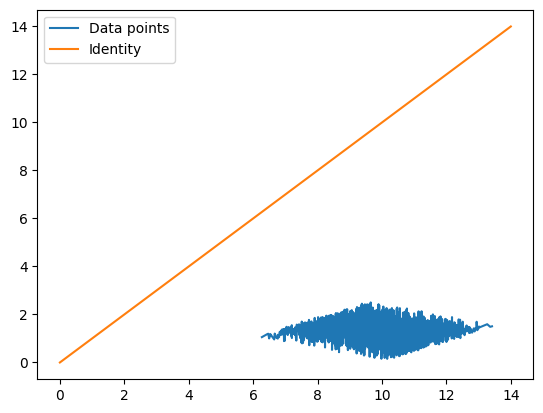

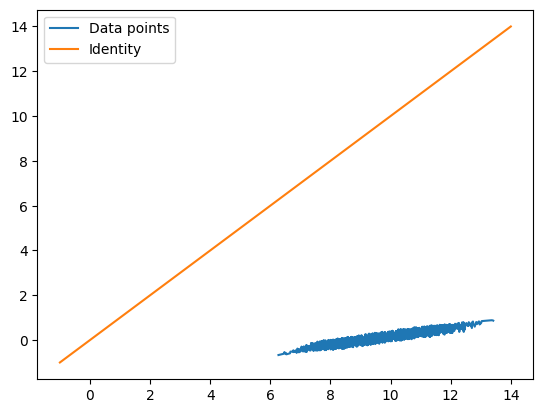

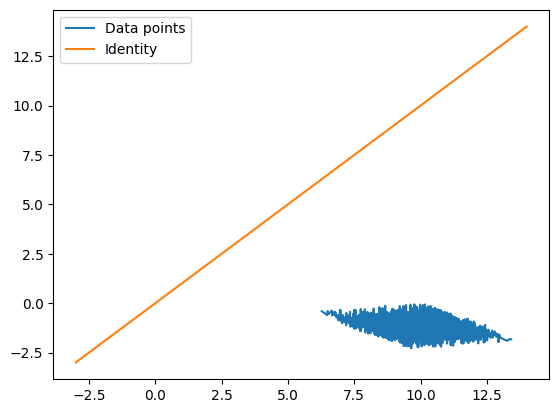

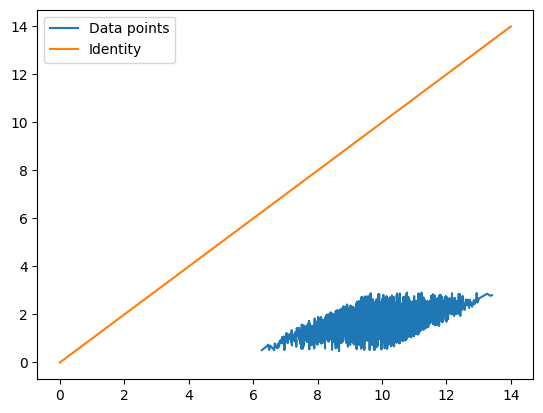

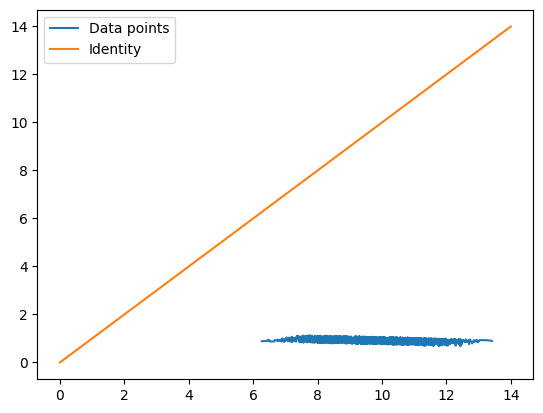

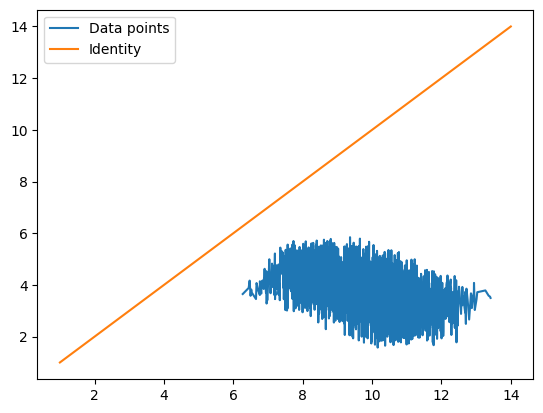

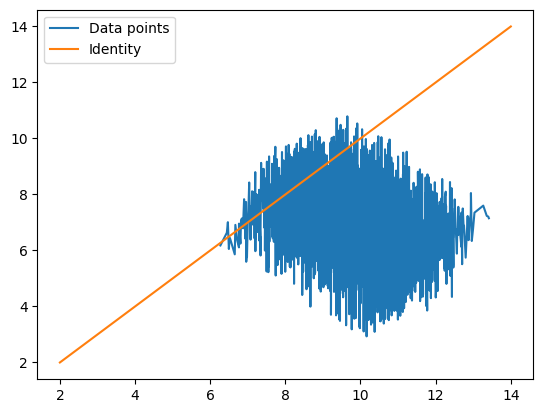

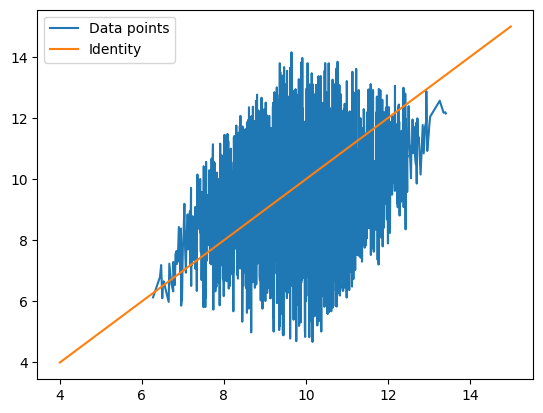

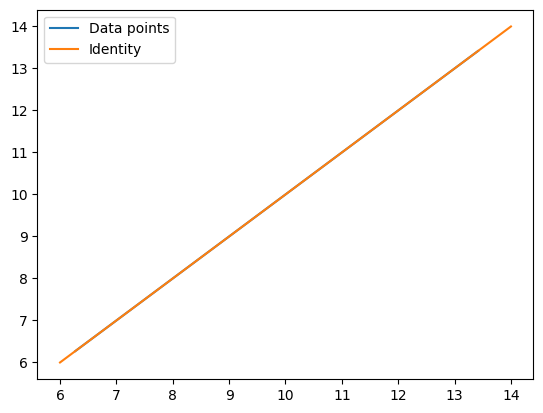

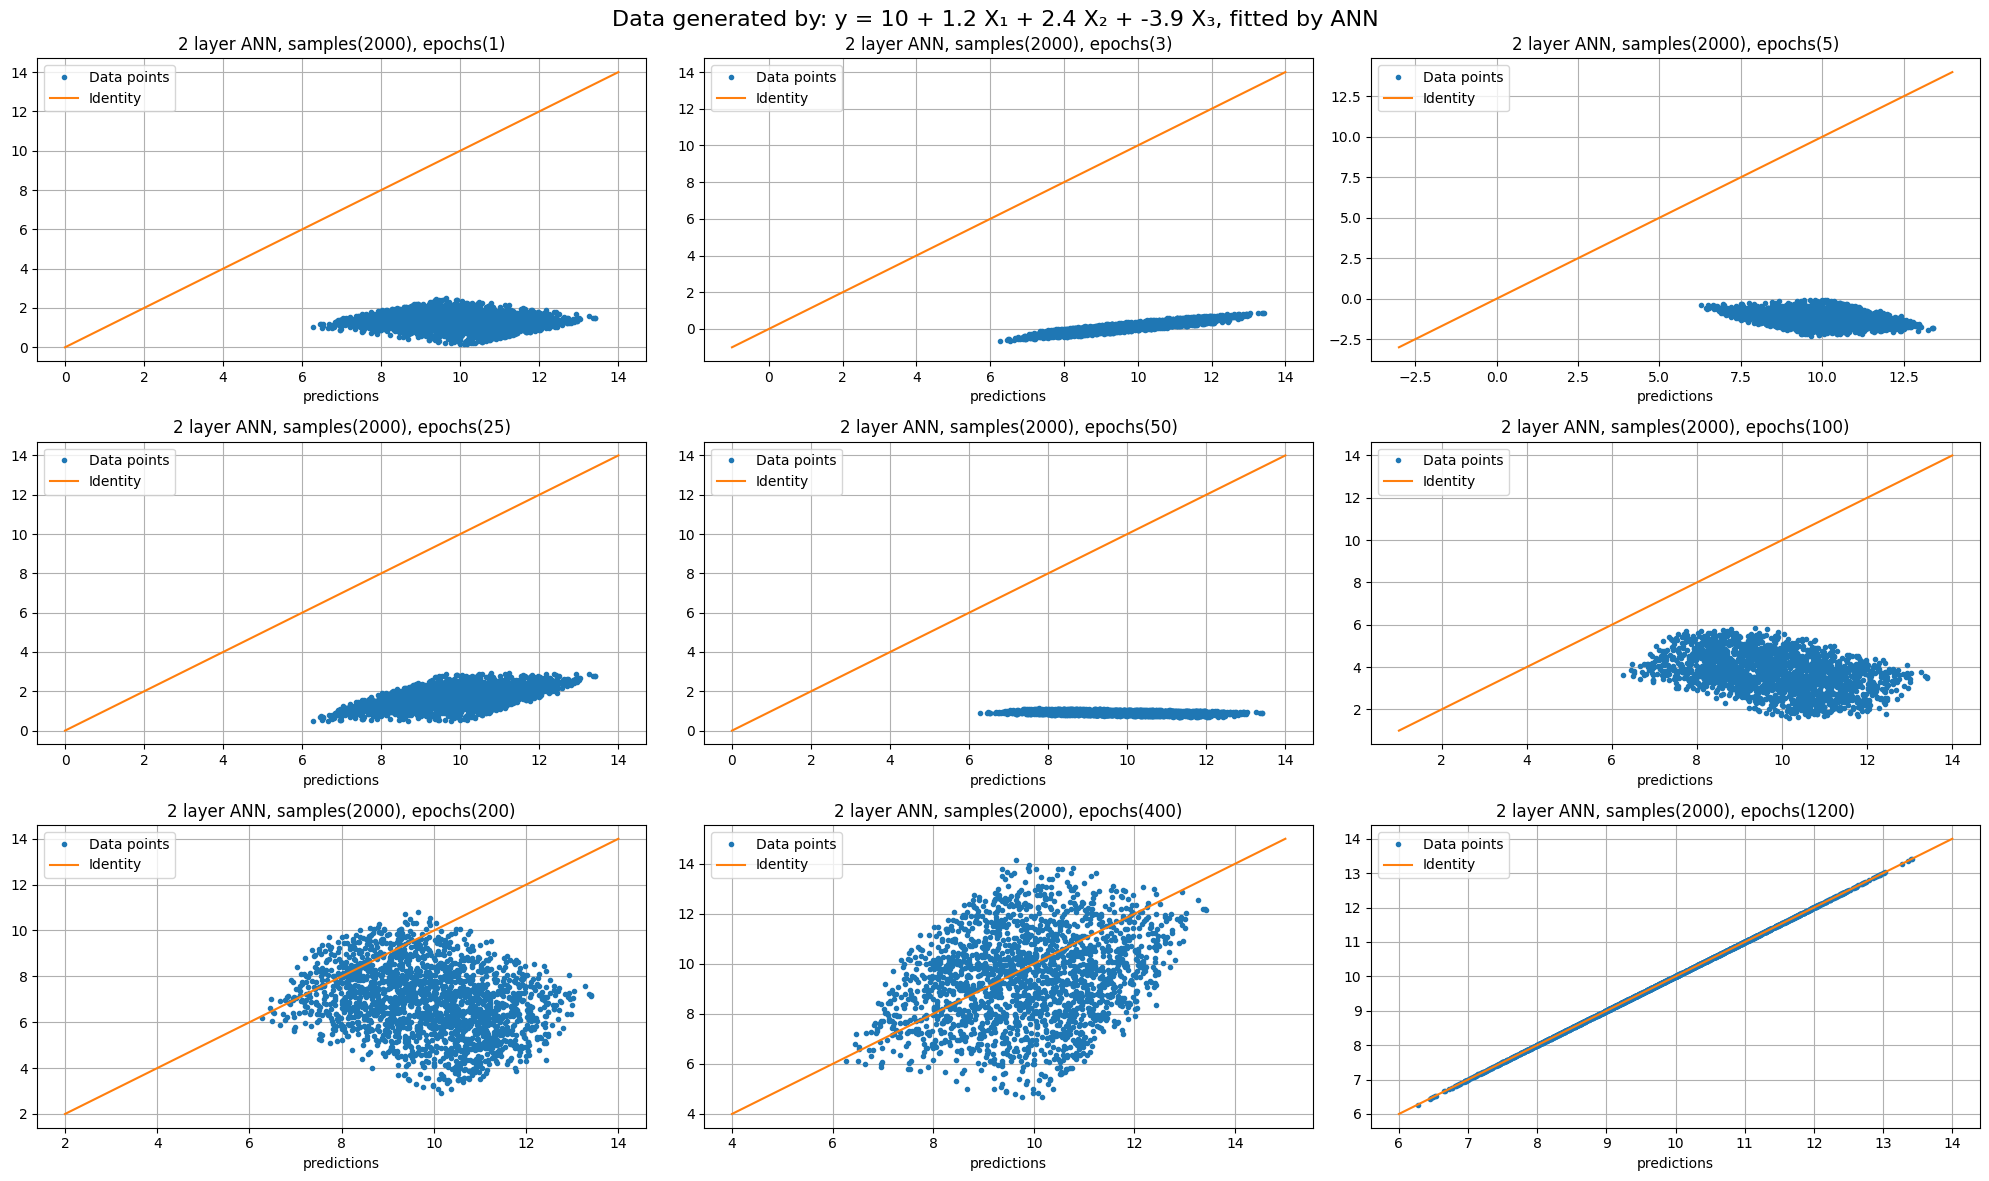

In [65]:
# Create a list to store the plot data (figure and axes)
plot_data = []

# Create plots in a loop
for series_set in series:
    fig, ax = plt.subplots()
    for x_data, y_data, label in series_set:
        ax.plot(x_data, y_data, label=label)
    ax.legend()
    plot_data.append((fig, ax))


# Create a new figure for the grid layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))

fig.suptitle('Data generated by: ' + model_as_text + ', fitted by ANN', fontsize=16)

# Flatten the axs array if necessary (in case of a single row or column)
if n_rows == 1 and n_cols == 1:
    axs = np.array([[axs]])

axs = axs.flatten()

# Loop over the plot_data array and plot in the grid
for i, (fig, ax) in enumerate(plot_data):
    for line in ax.get_lines():
        if (line.get_label() == 'Identity'):
          style = '-'
        else:
          style = '.'
        axs[i].plot(line.get_xdata(), line.get_ydata(), style, label=line.get_label())
    axs[i].legend()
    axs[i].set_xlabel('y')
    axs[i].set_xlabel('predictions')
    axs[i].set_title(titles[i])
    axs[i].grid(True)


# Adjust layout
plt.tight_layout()

# Display the grid of plots
#plt.show()
fig.show()

In [66]:
# Extract and print model weights
print("here are the weights: \n")
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    for i, weight in enumerate(weights):
        print(f"Weight {i + 1}:")
        print(weight)

here are the weights: 

Layer: dense_119
Weight 1:
[[ 1.2002407]
 [ 2.400263 ]
 [-3.8996358]]
Weight 2:
[9.999537]


The model architecture


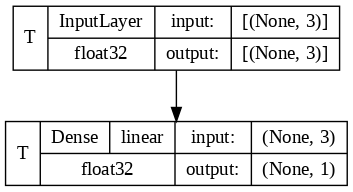

In [67]:
# Generate a plot of the model architecture
print("The model architecture")
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           show_dtype=True,
           expand_nested=True,
           dpi=100,
           show_layer_activations=True,
           show_trainable=True)
